In [1]:
#Import Libraries And Read The Data
%reset -f
import time                   
import warnings               

import numpy as np            
import pandas as pd            
import matplotlib.pyplot as plt                   

from sklearn import cluster, mixture              
from sklearn.preprocessing import StandardScaler  

import os                     
import sys 

from sklearn import metrics

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
X= pd.read_csv("data/2017.csv", header = 0)

In [3]:
X_copy = X
X = X.iloc[:, 2: ]

In [4]:
# Function for various clusters
def compute_cluster (clType,df= X):
    if clType=='KMeans':
        result = cluster.KMeans(n_clusters= 2).fit_predict(df) 
    elif clType == 'MeanShift' :
        result = cluster.MeanShift(bandwidth=0.2).fit_predict(df)    
    elif clType == 'MiniBatchKMeans':
        result = cluster.MiniBatchKMeans(n_clusters=2).fit_predict(df)        
    elif clType == 'Birch':
        result = cluster.Birch(n_clusters= 2).fit_predict(df)  
    else:
        print("exit")
    
    cl_df.loc[cl_df.Name == clType, 'Silhouette-Coeff'] = metrics.silhouette_score(df, result, metric='euclidean')
    
    return result

In [5]:
ss = StandardScaler().fit_transform(X)

In [6]:
cl_dist = {'Name' : ['KMeans','MeanShift','MiniBatchKMeans','Birch']}
cl_df = pd.DataFrame(cl_dist)
cl=pd.Series(['KMeans','MeanShift','MiniBatchKMeans','Birch'])

In [7]:
X.head(5)

,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
#Silhouette Coefficient
for i in range(0,cl.size) :
    result = compute_cluster(clType=cl[i])
    X[cl[i]] = pd.DataFrame(result)

In [9]:
cl_df

,Name,Silhouette-Coeff
0,KMeans,0.502392
1,MeanShift,0.057348
2,MiniBatchKMeans,0.631099
3,Birch,0.612836


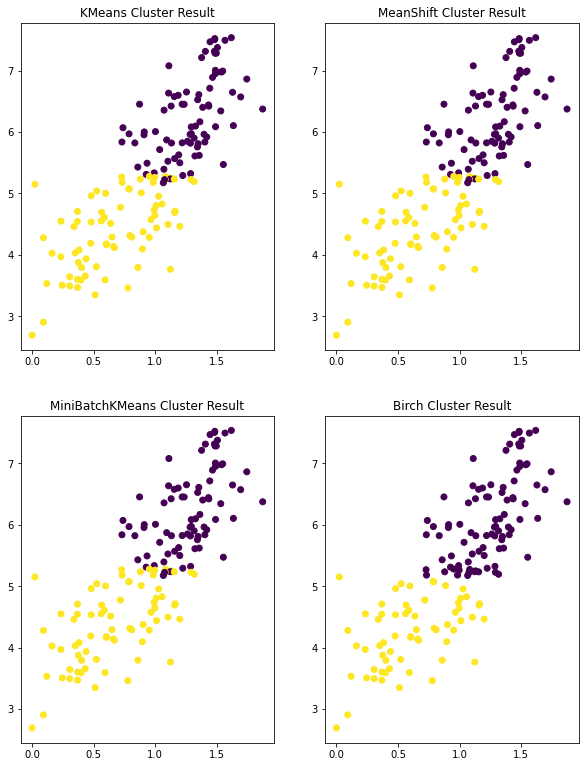

In [10]:
#Visualization
rows = 2    
cols = 2    

fig,ax = plt.subplots(rows,cols, figsize=(10, 5)) 
x = 0
y = 0
for i in cl:
    ax[x,y].scatter(X.iloc[:, 3], X.iloc[:, 0],  c=X.iloc[:, 12+(x*y)])
    ax[x,y].set_title(i + " Cluster Result")
    y = y + 1
    if y == cols:
        x = x + 1
        y = 0
        plt.subplots_adjust(bottom=-0.5, top=1.5)
plt.show()